<a href="https://colab.research.google.com/github/mxyptlik/Code_alpha_projects_Sam_Favour/blob/main/Real_time_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
!pip install librosa numpy pandas scikit-learn tensorflow

In [6]:

from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/TESS Toronto emotional speech set data'

!ls "{dataset_path}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 OAF_angry     OAF_neutral				 YAF_angry     YAF_neutral
 OAF_disgust   OAF_Pleasant_surprise			 YAF_disgust   YAF_pleasant_surprised
 OAF_Fear      OAF_Sad					 YAF_fear      YAF_sad
 OAF_happy    'TESS Toronto emotional speech set data'	 YAF_happy


In [8]:
!ls "/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav"

!file "/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav"


'/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav'
/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav: empty


In [9]:
!rm -v "/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav"

removed '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav'


In [10]:
import os
import librosa
import numpy as np

features = []
labels = []
speakers = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)

            if os.path.getsize(file_path) == 0:
                print(f"Skipping empty file: {file_path}")
                continue

            try:
                y, sr = librosa.load(file_path, sr=22050, mono=True)

                if len(y) == 0:
                    print(f"Empty audio: {file_path}")
                    continue

                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                mfcc_processed = np.mean(mfcc.T, axis=0)

                features.append(mfcc_processed)
                labels.append(os.path.basename(root).lower())
                speakers.append(file.split('_')[0].upper())

            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue

In [11]:
!find "/content/drive/MyDrive/TESS Toronto emotional speech set data" -name "*.wav" -size 0

from collections import Counter
print("Valid files per emotion:", Counter(labels))

Valid files per emotion: Counter({'oaf_fear': 400, 'oaf_pleasant_surprise': 400, 'oaf_sad': 400, 'oaf_angry': 400, 'oaf_disgust': 400, 'oaf_happy': 400, 'oaf_neutral': 400, 'yaf_angry': 400, 'yaf_disgust': 400, 'yaf_neutral': 400, 'yaf_happy': 400, 'yaf_sad': 400, 'yaf_pleasant_surprised': 400, 'yaf_fear': 399})


In [12]:
features = []
labels = []
speakers = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)

            emotion = os.path.basename(root).lower()

            speaker = file.split('_')[0].upper()

            y, sr = librosa.load(file_path, sr=22050)

            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
            mfcc_processed = np.mean(mfcc.T, axis=0)

            features.append(mfcc_processed)
            labels.append(emotion)
            speakers.append(speaker)

X = np.array(features)
y = np.array(labels)
speakers = np.array(speakers)

In [14]:
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            dir_name = os.path.basename(root)
            emotion = dir_name.split('_')[-1].lower()
            labels.append(emotion)

In [17]:
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")

Features shape: (5599, 40), Labels shape: (11198, 22)


In [18]:
features = []
labels = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)

            if os.path.getsize(file_path) == 0:
                continue

            try:
                y, sr = librosa.load(file_path, sr=22050)

                emotion = os.path.basename(root).split('_')[-1].lower()

                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                features.append(np.mean(mfcc.T, axis=0))
                labels.append(emotion)

                for aug_y in augment_audio(y, sr):
                    aug_mfcc = librosa.feature.mfcc(y=aug_y, sr=sr, n_mfcc=40)
                    features.append(np.mean(aug_mfcc.T, axis=0))
                    labels.append(emotion)

            except Exception as e:
                print(f"Skipped {file}: {str(e)}")
                continue

Streaming output truncated to the last 5000 lines.
Skipped OAF_soap_sad.wav: name 'augment_audio' is not defined
Skipped OAF_deep_angry.wav: name 'augment_audio' is not defined
Skipped OAF_jar_angry.wav: name 'augment_audio' is not defined
Skipped OAF_lid_angry.wav: name 'augment_audio' is not defined
Skipped OAF_dip_angry.wav: name 'augment_audio' is not defined
Skipped OAF_boat_angry.wav: name 'augment_audio' is not defined
Skipped OAF_fat_angry.wav: name 'augment_audio' is not defined
Skipped OAF_bought_angry.wav: name 'augment_audio' is not defined
Skipped OAF_knock_angry.wav: name 'augment_audio' is not defined
Skipped OAF_learn_angry.wav: name 'augment_audio' is not defined
Skipped OAF_date_angry.wav: name 'augment_audio' is not defined
Skipped OAF_chief_angry.wav: name 'augment_audio' is not defined
Skipped OAF_book_angry.wav: name 'augment_audio' is not defined
Skipped OAF_bar_angry.wav: name 'augment_audio' is not defined
Skipped OAF_goal_angry.wav: name 'augment_audio' is not

In [19]:
assert len(features) == len(labels), "Mismatched features/labels!"
print(f"Final counts - Features: {len(features)}, Labels: {len(labels)}")

Final counts - Features: 5599, Labels: 5599


In [20]:
X = np.array(features)
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical,
    test_size=0.2,
    stratify=y_categorical,
    random_state=42
)

In [21]:
print(f"Train shapes: {X_train.shape}, {y_train.shape}")
print(f"Test shapes: {X_test.shape}, {y_test.shape}")

Train shapes: (4479, 40), (4479, 8)
Test shapes: (1120, 40), (1120, 8)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM

# Base Model (Dense Network)
def create_base_model(input_shape, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Optional Advanced Models
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(input_shape[0], 1)),
        MaxPooling1D(2),
        Conv1D(128, 3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(input_shape[0], 1)),
        LSTM(64),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [30]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2798, 40)
y_train shape: (2798,)


In [31]:
from tensorflow.keras.utils import to_categorical

y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.4, stratify=y_categorical, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [32]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



X_train: (3359, 40), y_train: (3359, 8)
X_val: (1120, 40), y_val: (1120, 8)
X_test: (1120, 40), y_test: (1120, 8)


In [33]:
def create_base_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_base_model(X_train.shape[1], y_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10,
                          restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1948 - loss: 22.0803 - val_accuracy: 0.0973 - val_loss: 2.0563
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2904 - loss: 2.0180 - val_accuracy: 0.4143 - val_loss: 1.5697
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4070 - loss: 1.6186 - val_accuracy: 0.6187 - val_loss: 1.1441
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 1.2937 - val_accuracy: 0.7705 - val_loss: 0.7893
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5878 - loss: 1.0769 - val_accuracy: 0.7857 - val_loss: 0.5455
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6615 - loss: 0.8474 - val_accuracy: 0.9089 - val_loss: 0.4212
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7361 - loss: 0.6867 - val_accuracy: 0.9455 - val_loss: 0.3127
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7606 - loss: 0.5864 - val_acc

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
print("Emotion classes:", le.classes_)
# Should output: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'pleasant' 'sad']
print("Sample label:", y_train[0])
print("Decoded label:", le.inverse_transform([np.argmax(y_train[0])]))
model.summary()

Emotion classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise' 'surprised']
Sample label: [0. 0. 0. 0. 0. 0. 1. 0.]
Decoded label: ['surprise']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,274 (520.61 KB)

 Trainable params: 44,424 (173.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,850 (347.07 KB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       160
     disgust       1.00      1.00      1.00       160
        fear       1.00      1.00      1.00       160
       happy       1.00      0.99      1.00       160
     neutral       1.00      1.00      1.00       160
         sad       1.00      1.00      1.00       160
    surprise       0.99      1.00      0.99        80
   surprised       1.00      1.00      1.00        80

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



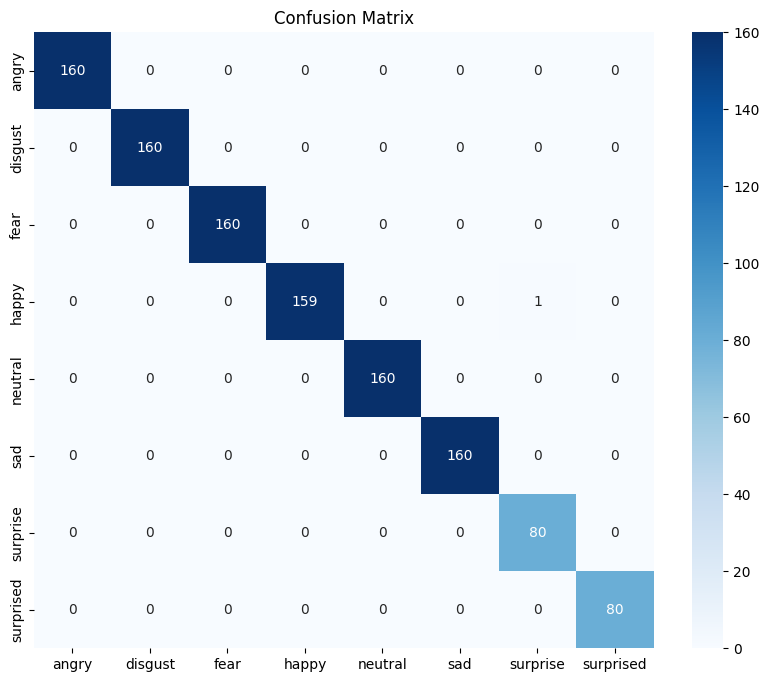

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, le):
    # Metrics
    y_pred = model.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

    # Confusion Matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_true, y_pred_classes),
                annot=True, fmt='d',
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(model, X_test, y_test, le)

In [39]:
!pip install keras-tuner
import keras
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', 128, 512, step=64),
                    activation='relu',
                    input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', 64, 256, step=32),
                    activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=10,
                        executions_per_trial=2,
                        directory='tuning_dir')

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_val, y_val),
             callbacks=[EarlyStopping(patience=5)])

Trial 10 Complete [00h 00m 36s]
val_accuracy: 0.9973214268684387

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 07m 23s


In [40]:
def augment_audio(y, sr):
    augmented = []

    # Time stretching
    augmented.append(librosa.effects.time_stretch(y, rate=0.8))

    augmented.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=2))

    noise = np.random.normal(0, 0.005, y.shape)
    augmented.append(y + noise)

    return augmented



In [41]:
!pip install tf-keras-vis
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam

def model_modifier(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
    return cloned_model

def create_gradcam(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    input_data = scaler.transform(np.mean(mfcc.T, axis=0).reshape(1, -1))

    gradcam = Gradcam(model, model_modifier, clone=False)
    cam = gradcam(input_data, penultimate_layer=-1)

    plt.figure(figsize=(10,4))
    plt.imshow(cam[0], aspect='auto', cmap='viridis')
    plt.title("Grad-CAM Visualization")
    plt.colorbar()
    plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.1 MB/s eta 0:00:00


In [43]:
import joblib
import tensorflow as tf

# Save artifacts
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
tf.keras.models.save_model(model, 'emotion_model.h5')

# Load for inference
def predict_emotion(audio_path):
    # Load artifacts
    scaler = joblib.load('scaler.pkl')
    le = joblib.load('label_encoder.pkl')
    model = tf.keras.models.load_model('emotion_model.h5')

    # Process audio
    y, sr = librosa.load(audio_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    features = scaler.transform(np.mean(mfcc.T, axis=0).reshape(1, -1))

    # Predict
    proba = model.predict(features)
    return le.inverse_transform(np.argmax(proba))[0], proba

In [44]:
model.save('my_model.keras')

In [46]:
!pip install gradio
import gradio as gr


In [48]:
def gradio_interface(audio):
    sr, y = audio
    y = y.astype(np.float32)
    y /= np.max(np.abs(y))

    temp_path = "temp.wav"
    sf.write(temp_path, y, sr)

    emotion, _ = predict_emotion(temp_path)
    return emotion

gr.Interface(
    fn=gradio_interface,
    inputs=gr.Audio(sources=["microphone"]),

    outputs="label",
    title="Real-Time Emotion Recognition",
    description="Record or upload speech to detect emotion"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://719fb44defc9e15d6b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
